In [6]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
# import graphviz
from sklearn.metrics import accuracy_score

def load_datasets():
    return datasets.load_digits(), datasets.load_iris(), datasets.load_breast_cancer()

def RandomForestImage(data): # 處理多維度資料, digits.images(1797, 8, 8)

    n_samples = len(data.images) # 這行跟下一行是把資料轉成二維
    data_images = data.images.reshape((n_samples, -1))
    train_data, test_data, train_label, test_label = train_test_split(data_images, data.target, test_size=0.2) # 切訓練、測試資料

    # 訓練隨機森林 (每個 2 層) 並預測結果
    t = 5  # 選擇決策樹數量
    clf = RandomForestClassifier(n_estimators=t, max_depth=2,random_state=0) # 建立隨機森林框架 n_estimators是要設定幾棵樹(弱模型)去投票
    # max_depth是設定樹的最大深度，越高表示模型可以長得越深，模型複雜度越高
    clf.fit(train_data,train_label)  # 餵訓練資料來訓練模型

    # 走訪和繪製隨機森林的所有決策樹
    plt.figure(figsize=(128, 64))
    for idx, dec_tree in enumerate(clf.estimators_):
      plt.subplot(1, t, idx+1)
      tree.plot_tree(dec_tree, filled=False, rounded=True, proportion=True, feature_names=None, class_names=None)
    plt.savefig('forest_image.png')

    # from google.colab import files
    # files.download("forest_image.png")
    ##########

    print('隨機森林進行數字(Digit)訓練資料影像預測:' ,clf.predict(test_data)[:30])
    print('數字(Digit)訓練資料影像真實值:' ,test_label[:30])
    acc1 = accuracy_score(train_label, clf.predict(train_data))
    print("數字(Digits)訓練資料影像預測準確率", round(acc1, 2))
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("數字(Digits)測試資料影像預測準確率", round(acc, 2))

def RandomForestValue(data, src='IRIS'):  #處理二維資料, iris.data已經是二維data

    train_data, test_data, train_label, test_label = train_test_split(data.data, data.target, test_size=0.2)

    # 訓練隨機森林 (每個 2 層) 並預測結果
    t = 5  # 選擇決策樹數量
    clf = RandomForestClassifier(n_estimators=t, max_depth=2,random_state=0)
    clf.fit(train_data, train_label)

    # 走訪和繪製隨機森林的所有決策樹
    plt.figure(figsize=(128, 64))
    for idx, dec_tree in enumerate(clf.estimators_):
      plt.subplot(1, t, idx+1)
      tree.plot_tree(dec_tree, filled=False, rounded=True, proportion=True, feature_names=None, class_names=None)
    plt.savefig('forest_iris.png')

    # from google.colab import files
    # files.download("forest_iris.png")
    ##########

    print(f'隨機森林進行{src}預測:' ,clf.predict(test_data)[:30])
    print(f'{src}真實值:' ,test_label[:30])
    acc1 = accuracy_score(train_label, clf.predict(train_data))
    print(f"{src}訓練資料準確率", round(acc1, 2))
    acc = accuracy_score(test_label, clf.predict(test_data))
    print(f"{src}測試資料準確率", round(acc, 2))


def show_digits_images(data):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))  # 調整圖像大小
    for i, ax in enumerate(axes):
        ax.axis('off')
        imside = int(np.sqrt(data.data[i].shape[0]))
        im1 = np.reshape(data.data[i], (imside, imside))
        ax.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'{data.target[i]}', fontsize=12)  # 確保標題不重疊
    plt.tight_layout()  # 自動調整間距
    plt.show()

digits, iris, cancer = load_datasets()




# http://hn28082251.blogspot.com/2018/07/random-forest.html

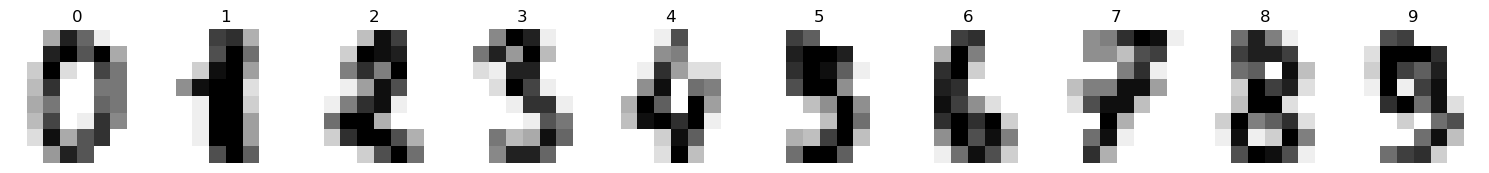

隨機森林進行數字(Digit)訓練資料影像預測: [4 5 3 6 9 4 4 9 6 3 3 4 7 4 1 6 6 7 5 5 9 9 4 1 0 8 3 3 9 5]
數字(Digit)訓練資料影像真實值: [1 6 3 5 9 1 0 9 6 9 2 4 7 4 1 6 6 7 5 1 7 9 4 1 0 8 3 3 9 5]
數字(Digits)訓練資料影像預測準確率 0.67
數字(Digits)測試資料影像預測準確率 0.66


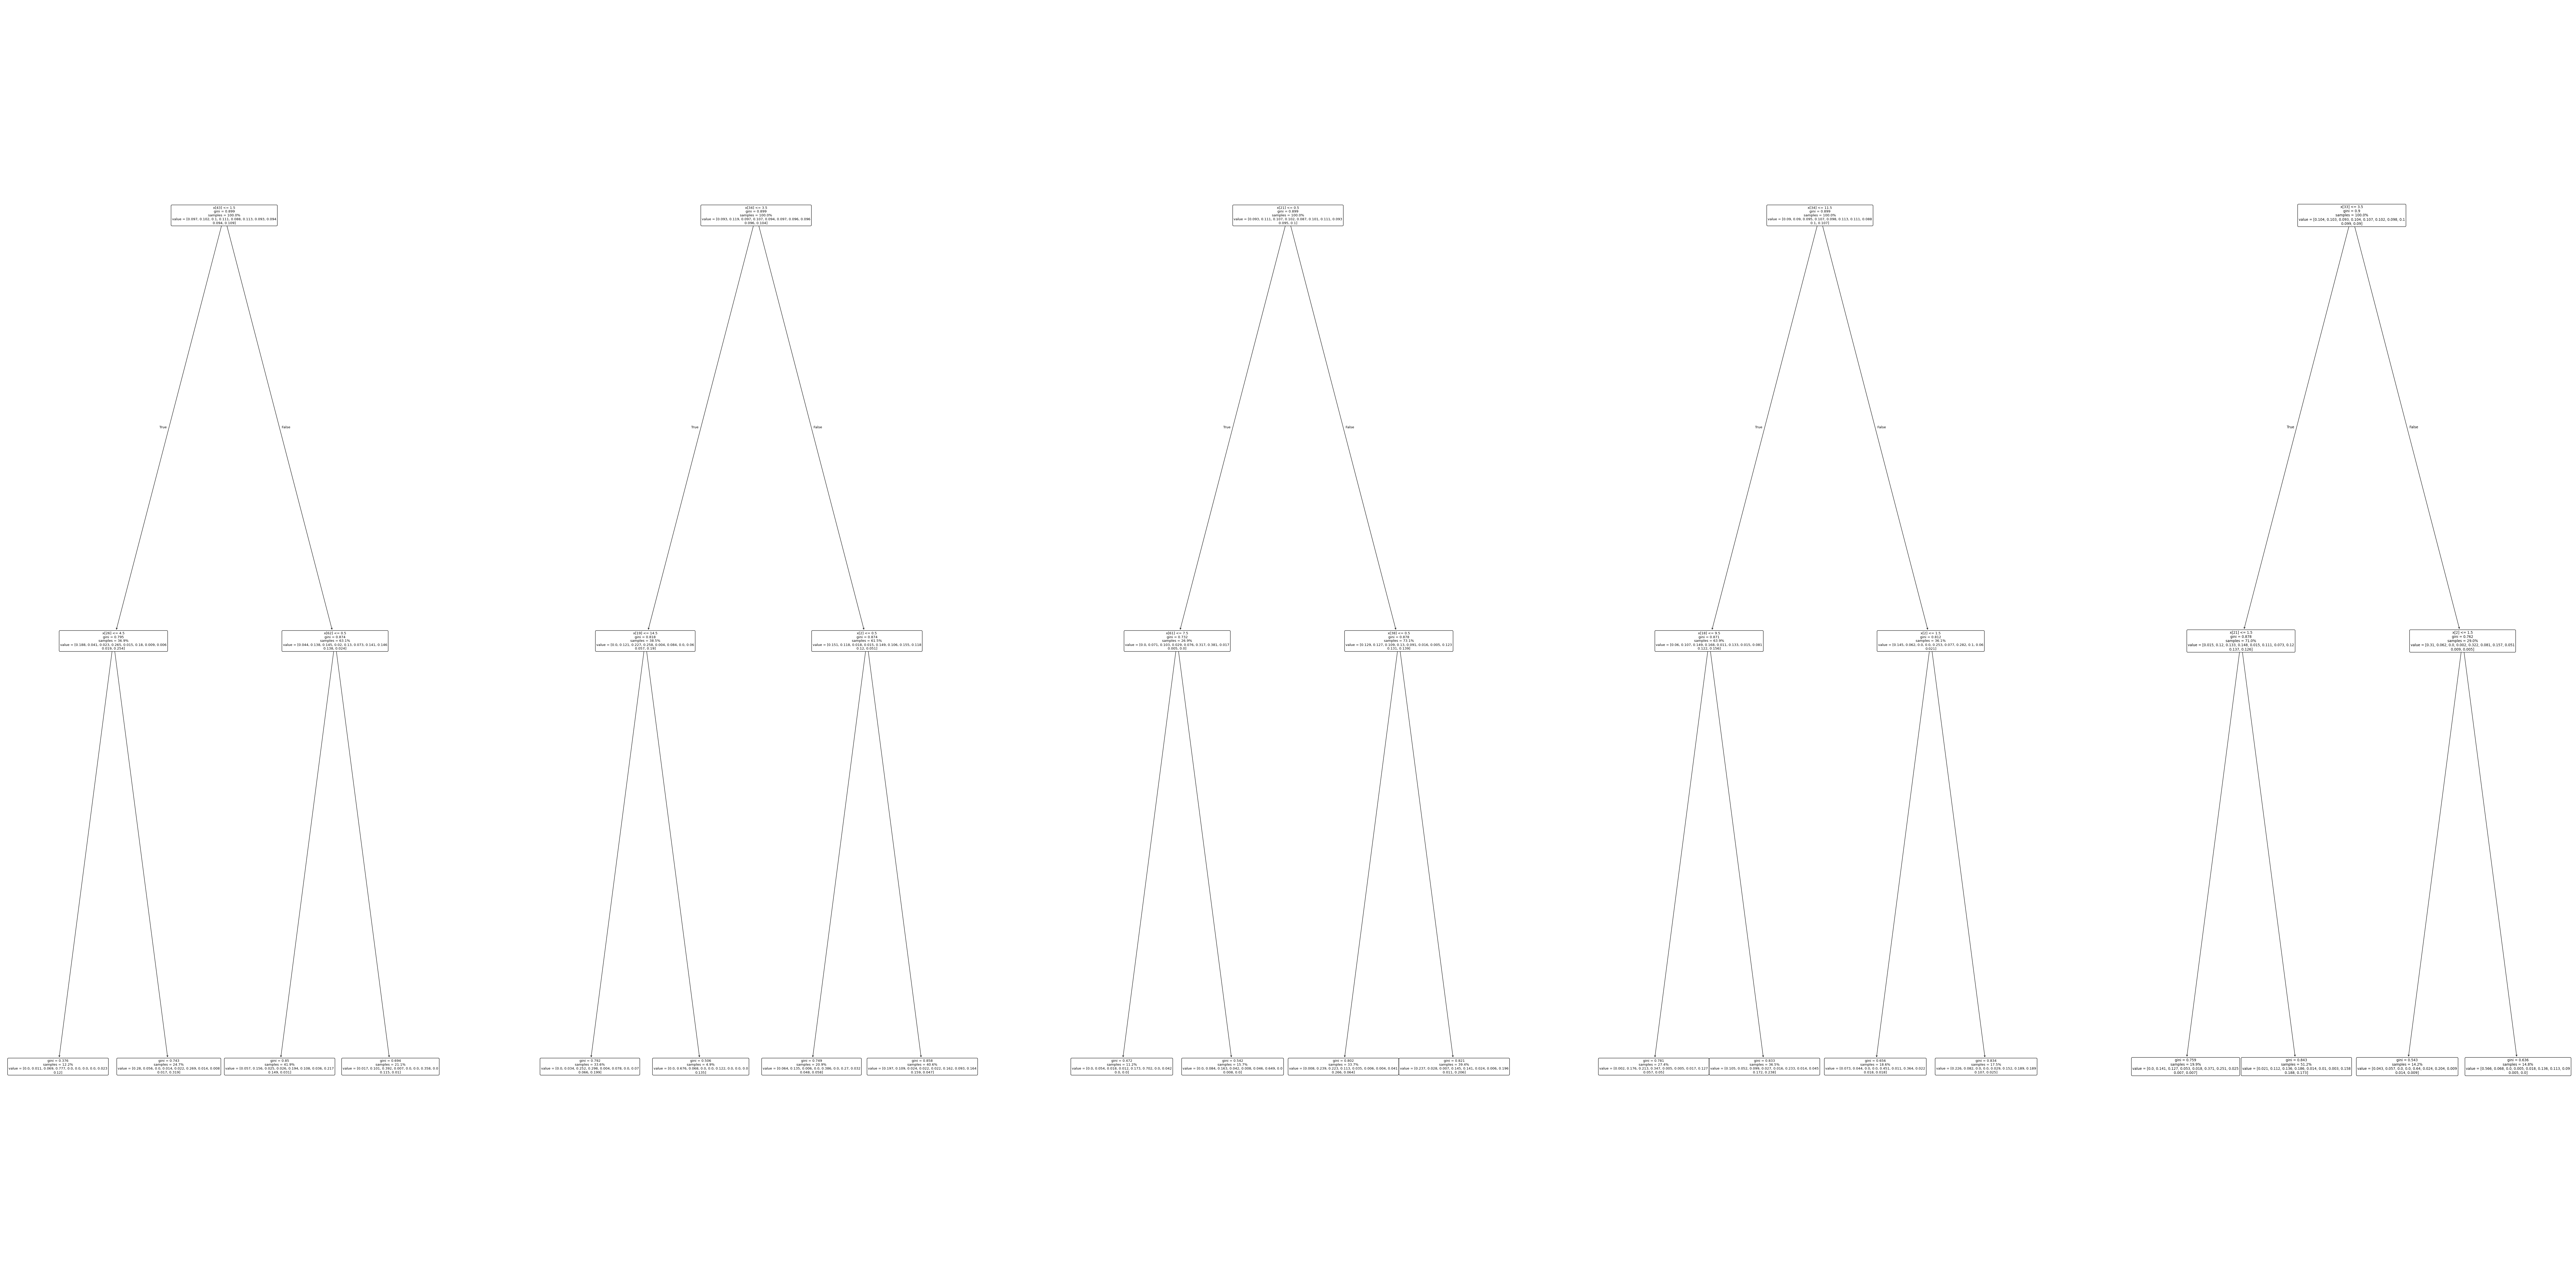

In [7]:
show_digits_images(digits)
RandomForestImage(digits)

隨機森林進行IRIS預測: [2 2 1 2 0 0 0 0 1 2 2 2 2 0 1 1 2 0 0 0 2 1 1 2 2 0 2 1 1 0]
IRIS真實值: [2 2 2 2 0 0 0 0 1 2 2 2 2 0 1 1 2 0 0 0 1 1 1 2 2 0 2 1 1 0]
IRIS訓練資料準確率 0.96
IRIS測試資料準確率 0.93


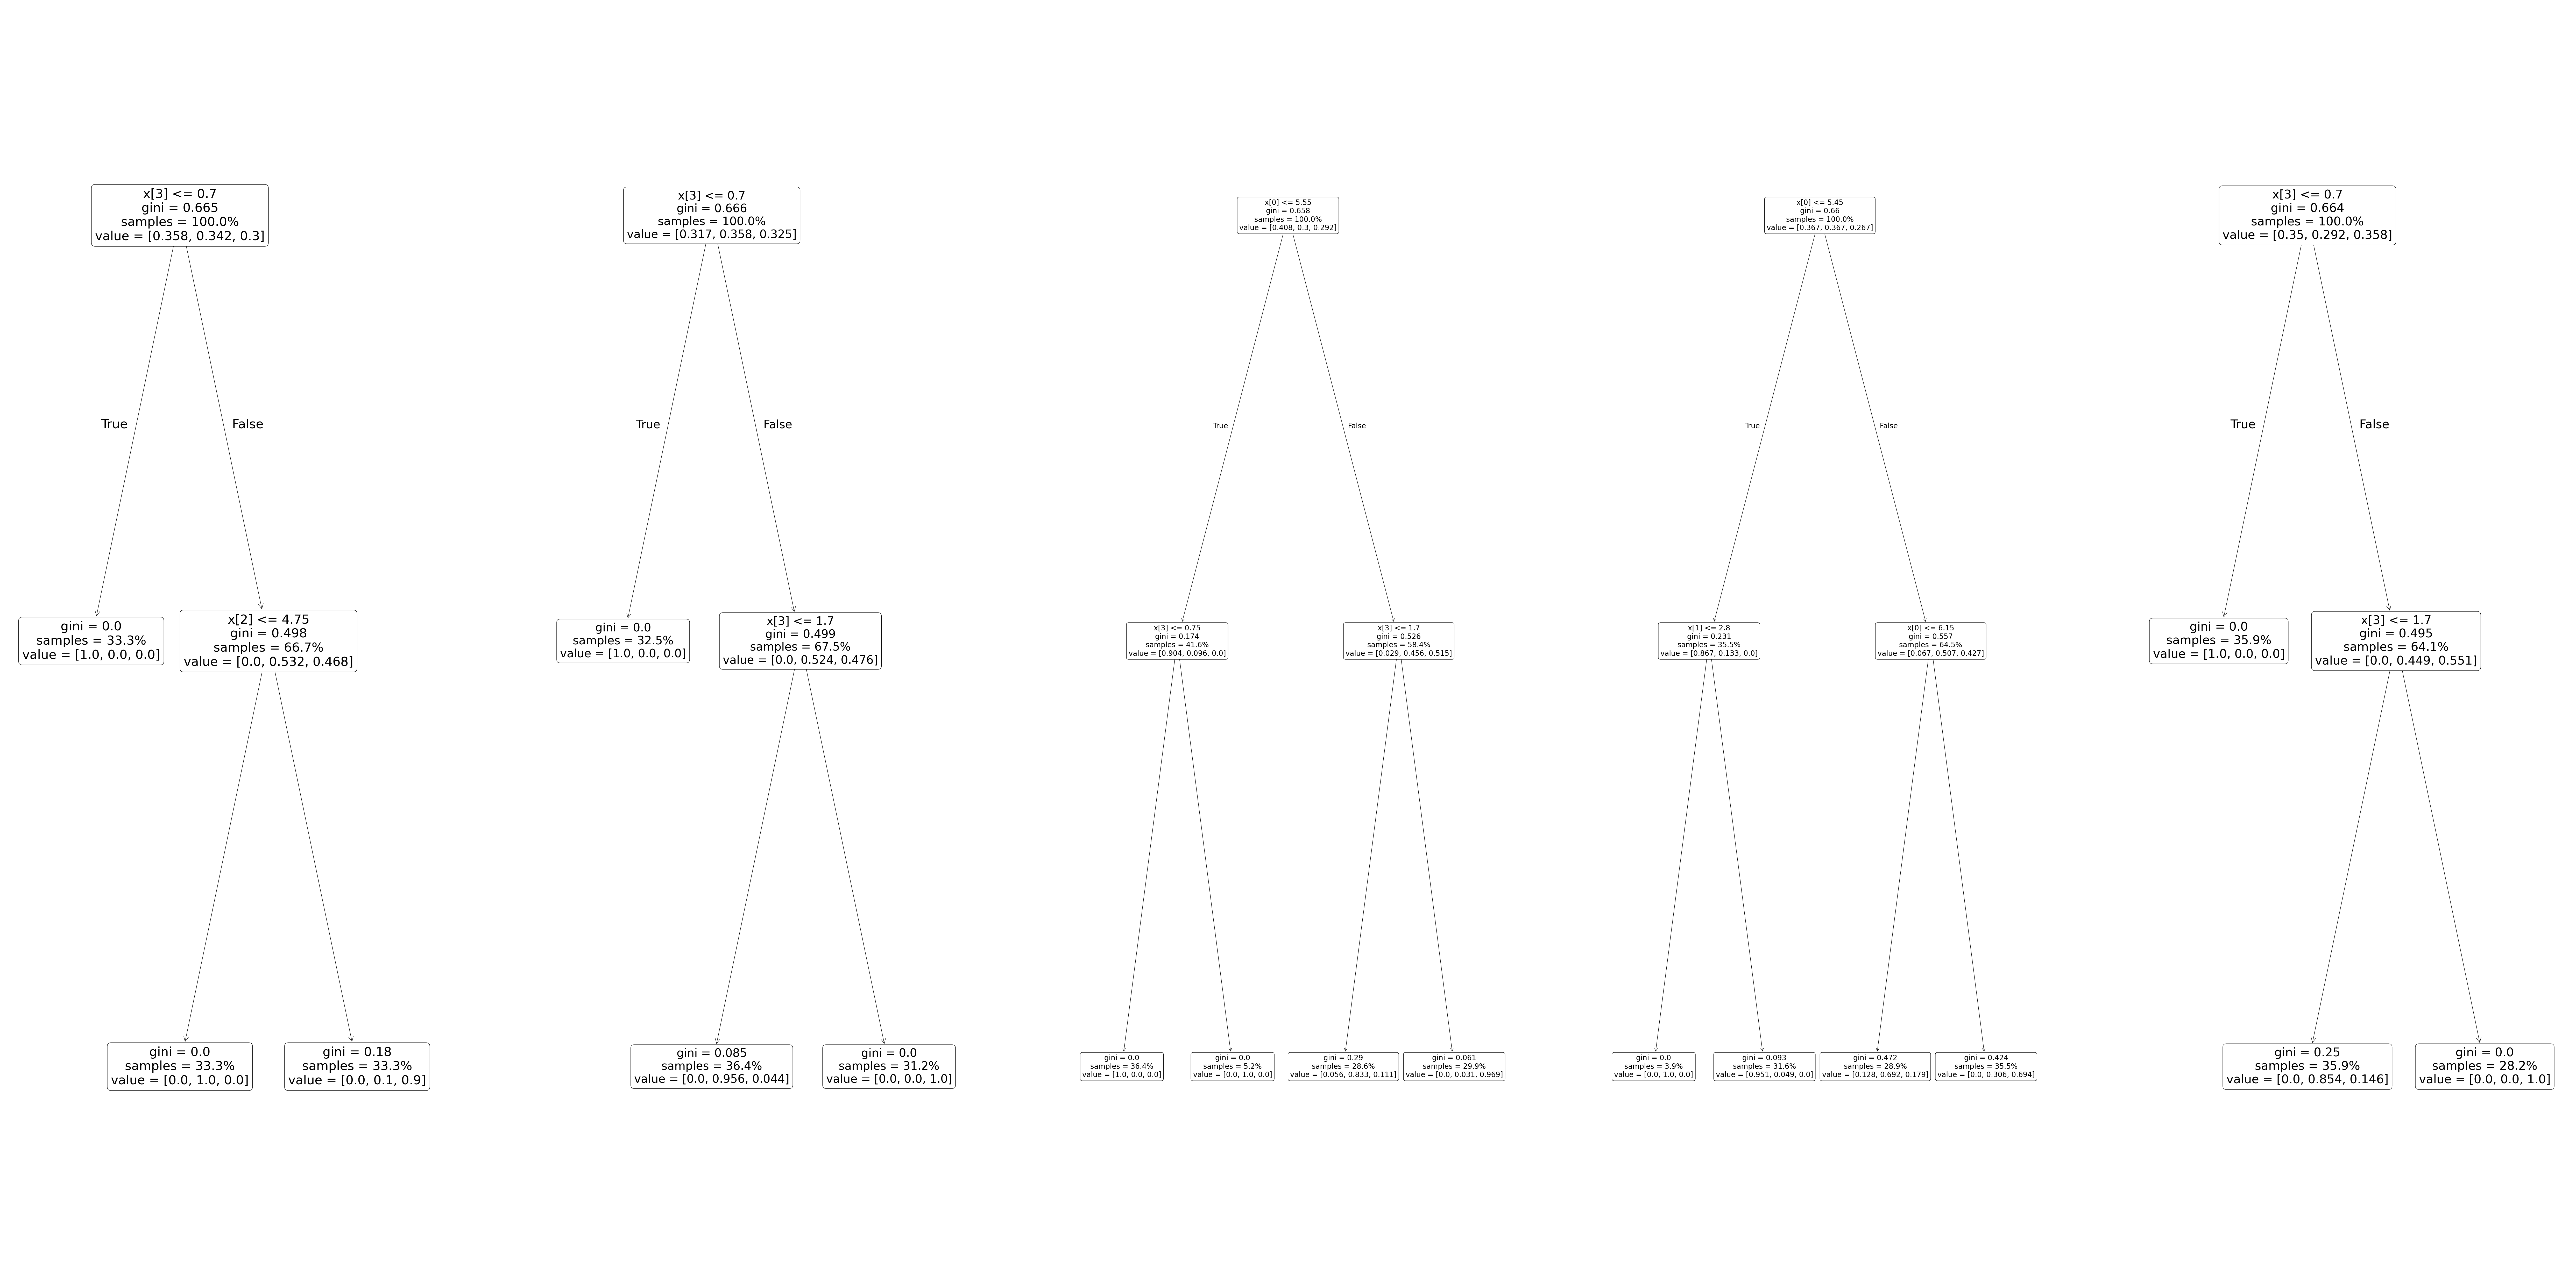

In [8]:
RandomForestValue(iris, "IRIS")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

隨機森林進行Breast_cancer預測: [1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1]
Breast_cancer真實值: [1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1]
Breast_cancer訓練資料準確率 0.95
Breast_cancer測試資料準確率 0.96


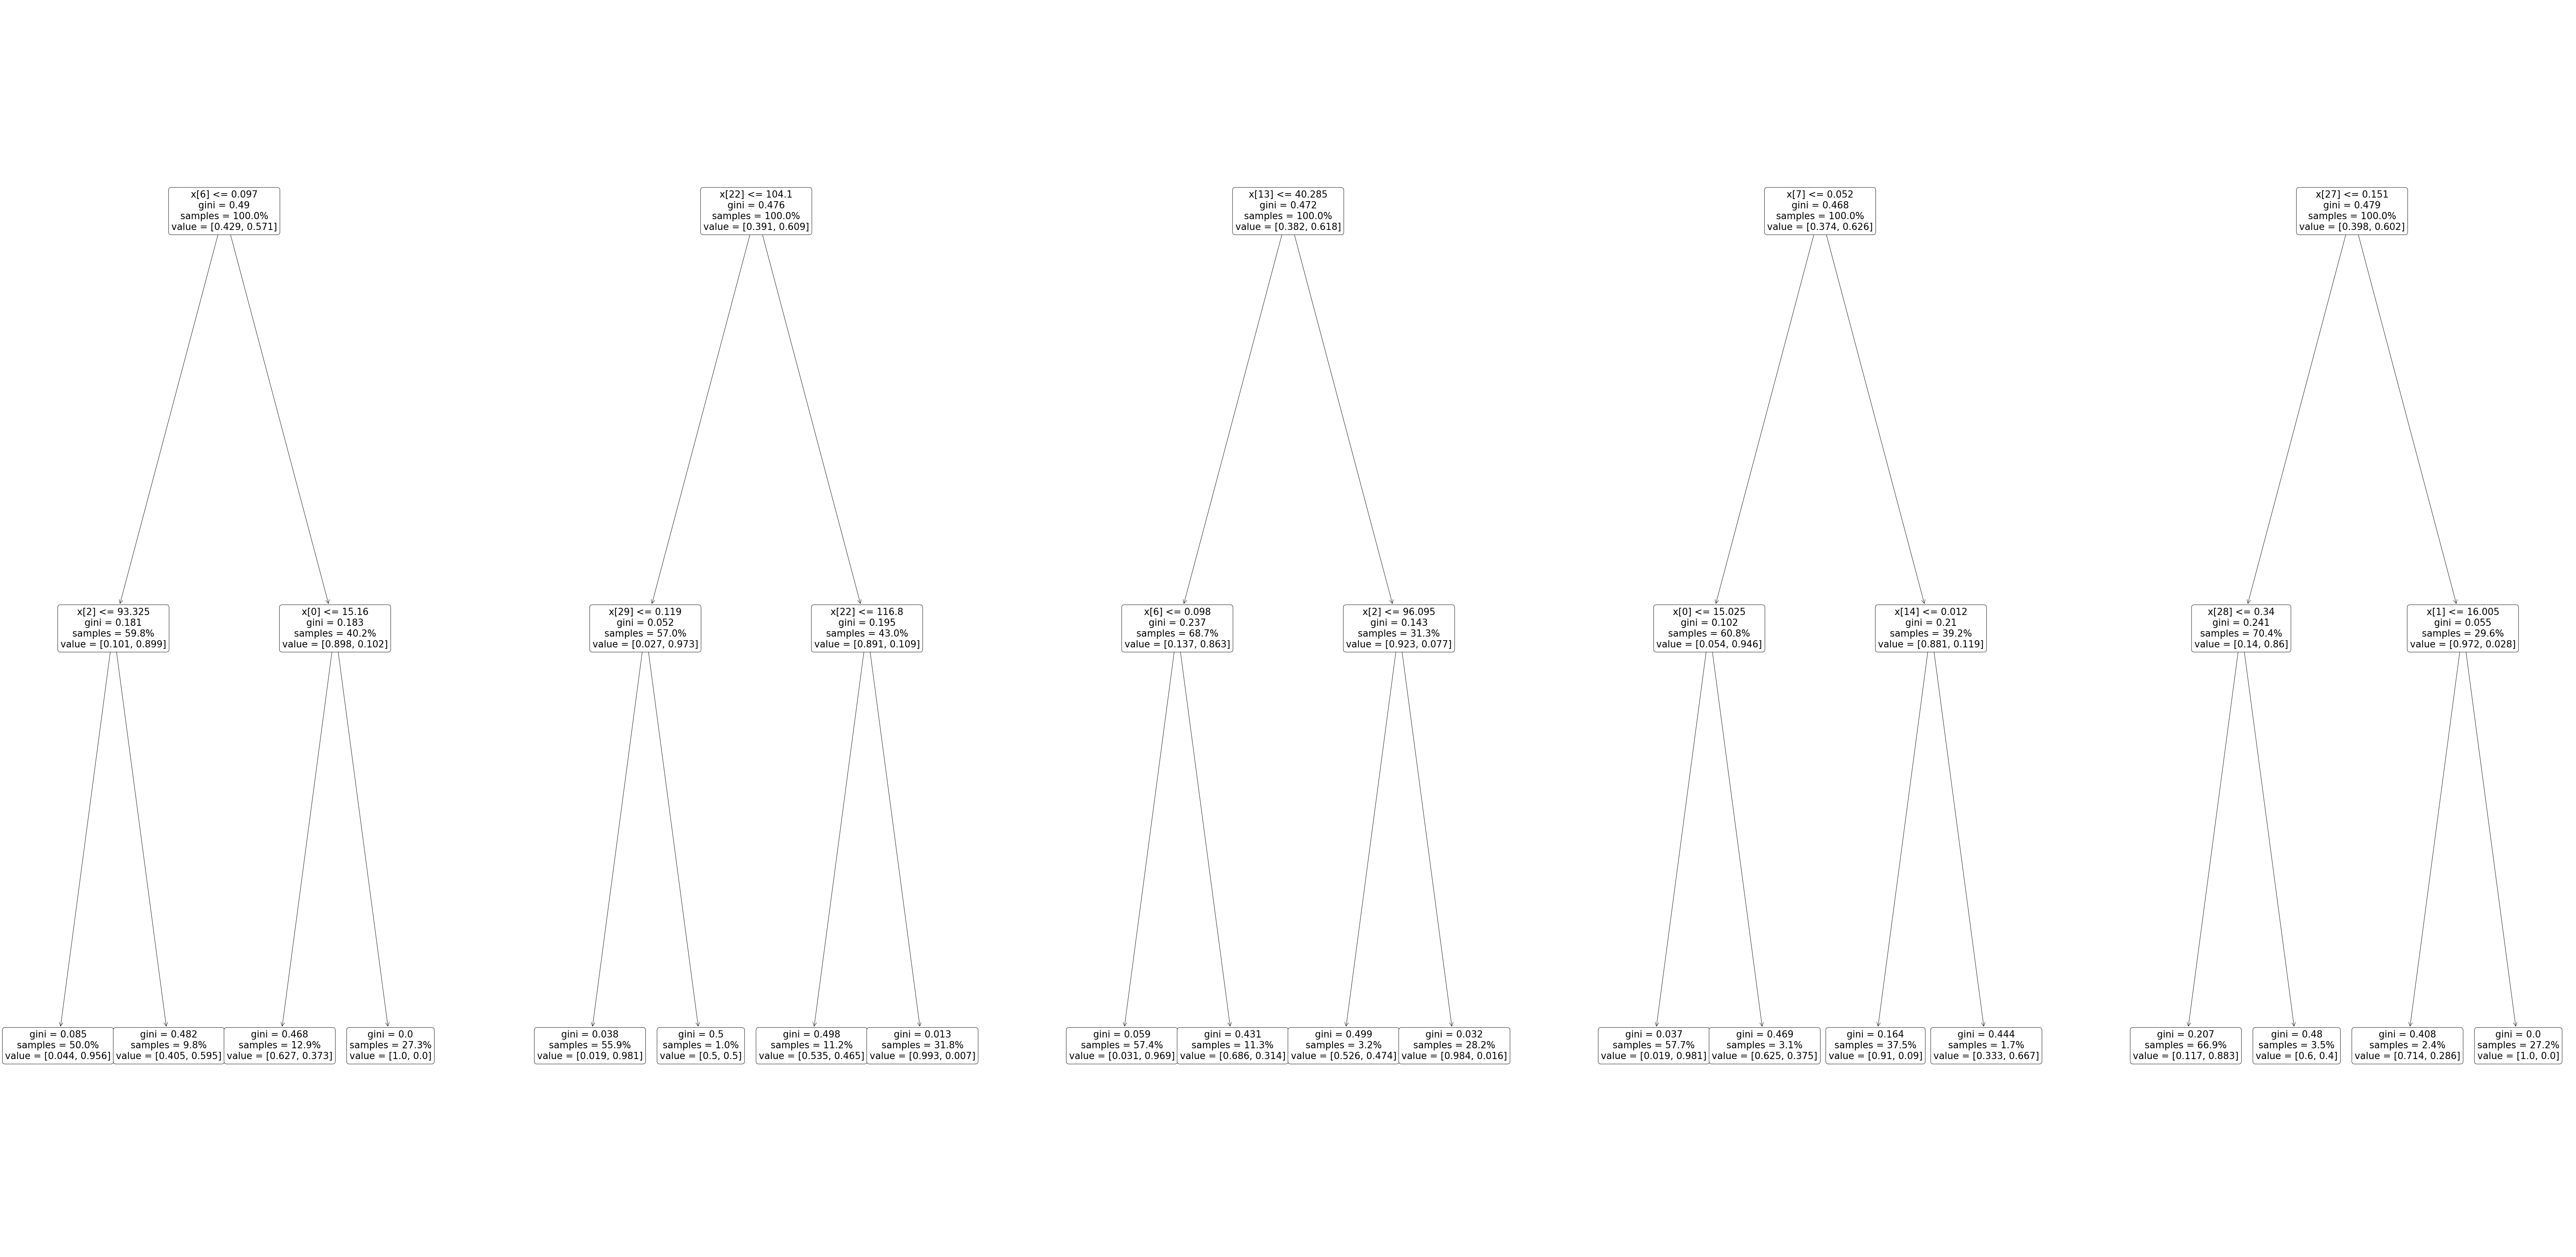

In [ ]:
RandomForestValue(cancer, "Breast_cancer")